In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

In [2]:
stock_data = yf.download('IRFC.NS')
stock_data.reset_index(inplace=True)
stock_data.rename(columns={'index': 'Date'}, inplace=True)
# stock_data.head()
# stock_data.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
814,2024-05-21,176.75,182.0,176.0,179.449997,179.449997,165354884


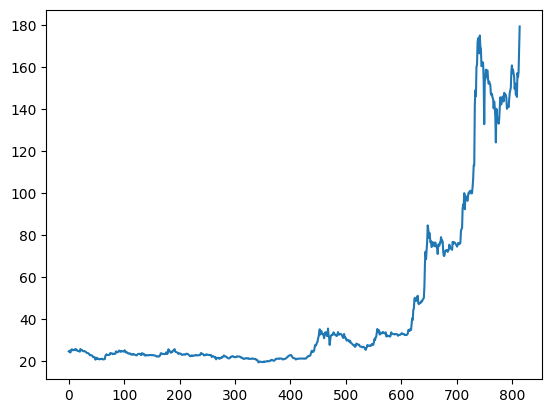

In [4]:
stock_selected_data = stock_data.reset_index()['Close']
plt.plot(stock_selected_data)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_selected_data=scaler.fit_transform(np.array(stock_selected_data).reshape(-1,1))

In [6]:
##splitting dataset into train and test split
training_size=int(len(stock_selected_data)*0.65)
test_size=len(stock_selected_data)-training_size
train_data,test_data=stock_selected_data[0:training_size,:],stock_selected_data[training_size:len(stock_selected_data),:1]

In [7]:
training_size,test_size

(529, 286)

In [8]:
train_data

array([[0.03313535],
       [0.03501094],
       [0.03282276],
       [0.02969678],
       [0.03657393],
       [0.03876212],
       [0.03907471],
       [0.03626133],
       [0.03688653],
       [0.03688653],
       [0.03688653],
       [0.03907471],
       [0.0400125 ],
       [0.03626133],
       [0.03844951],
       [0.03657393],
       [0.03438575],
       [0.03407315],
       [0.03376055],
       [0.03407315],
       [0.03219756],
       [0.0400125 ],
       [0.03844951],
       [0.03751172],
       [0.03688653],
       [0.03407315],
       [0.03344796],
       [0.03407315],
       [0.03344796],
       [0.03344796],
       [0.03219756],
       [0.03157236],
       [0.02907158],
       [0.02844639],
       [0.0278212 ],
       [0.02750859],
       [0.0268834 ],
       [0.02469522],
       [0.02156925],
       [0.02219443],
       [0.02156925],
       [0.02125664],
       [0.02094405],
       [0.01875586],
       [0.01562988],
       [0.01656768],
       [0.01531729],
       [0.015

In [9]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(y_train.shape)

(428, 100)
(428,)


(None, None)

In [12]:
print(X_test.shape), print(ytest.shape)

(185, 100)
(185,)


(None, None)

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

X_train.shape, X_test.shape

((428, 100, 1), (185, 100, 1))

In [14]:
### Create the Stacked LSTM model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.models import Sequential
from keras.regularizers import l2


In [60]:
# model = Sequential()

# # First LSTM layer with tanh activation
# model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(100, 1)))
# model.add(Dropout(0.2))

# # Second LSTM layer with tanh activation
# model.add(LSTM(units=60, activation='tanh', return_sequences=True))
# model.add(Dropout(0.2)) # Adjusted dropout rate

# # Third LSTM layer with tanh activation
# model.add(LSTM(units=80, activation='tanh', return_sequences=True))
# model.add(Dropout(0.2)) # Adjusted dropout rate

# # Fourth LSTM layer with tanh activation
# model.add(LSTM(units=120, activation='tanh'))
# model.add(Dropout(0.2)) # Adjusted dropout rate

# # Output layer
# model.add(Dense(units=1))

model = Sequential()

### Dropout value change to 0.5

# Add a bidirectional LSTM layer with 100 units
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(100, 1)))
model.add(Dropout(0.2))

# Add another bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.2))

# Add a third bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.2))

# Add a fourth bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.2))

# Add a dense layer with L2 regularization
model.add(Dense(units=50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 100, 200)       │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 100, 200)       │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 100, 200)       │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,101 (3.11 MB)

 Trainable params: 814,101 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=100, batch_size=62)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - loss: 0.5739 - val_loss: 0.1567
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 448ms/step - loss: 0.1040 - val_loss: 0.0358
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 36s 491ms/step - loss: 0.0139 - val_loss: 0.0300
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 583ms/step - loss: 0.0019 - val_loss: 0.0233
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 592ms/step - loss: 5.6782e-04 - val_loss: 0.0137
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 45s 605ms/step - loss: 5.7885e-04 - val_loss: 0.0206
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 45s 606ms/step - loss: 5.0237e-04 - val_loss: 0.0223
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 591ms/step - loss: 4.6881e-04 - val_loss: 0.0222
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 594ms/step - loss: 4.1187e-04 - val_loss: 0.0268
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 599ms/step - loss: 0.0025 - val_loss: 0.0183
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 595ms/step - loss: 4.4733e-04 - val_loss: 0.0243
Epoch 

In [15]:
### Lets Do the prediction and check performance metrics
from tensorflow.keras.models import load_model
model = load_model('old_models/stock_ann_model.h5')
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print(train_predict)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.03247606]
 [0.0327391 ]
 [0.03557644]
 [0.03392273]
 [0.03039562]
 [0.03018556]
 [0.03034588]
 [0.028929  ]
 [0.0273464 ]
 [0.02703165]
 [0.02652172]
 [0.02713772]
 [0.02651955]
 [0.02531219]
 [0.02354287]
 [0.02366957]
 [0.02403111]
 [0.02360515]
 [0.02493496]
 [0.02400306]
 [0.02344445]
 [0.02260334]
 [0.02194759]
 [0.02110745]
 [0.02168421]
 [0.02333748]
 [0.02491751]
 [0.02541889]
 [0.02566731]
 [0.02519376]
 [0.02508766]
 [0.02265494]
 [0.02213093]
 [0.02660848]
 [0.02697818]
 [0.02656253]
 [0.02442019]
 [0.02443814]
 [0.02236604]
 [0.02068922]
 [0.02139853]
 [0.02215598]
 [0.02154377]
 [0.0210637 ]
 [0.02167358]
 [0.02157645]
 [0.02199451]
 [0.02183651]
 [0.02201411]
 [0.02206133]
 [0.02182142]
 [0.02176609]
 [0.02201772]
 [0.02159699]
 [0.02148653]
 [0.0209929 ]
 [0.02063961]
 [0.02058253]
 [0.01985328]
 [0.01845356]
 [0.01790291]
 [0.01808501]
 [0.01766585]
 [0.01826468]
 [0.01791737]
 [0.01923832

In [62]:
model.save('enhanced_stock_100_epocs_ann_model_v2.h5')

In [17]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [18]:
print(train_predict.shape)
print(train_predict)

(428, 1)
[[24.694546]
 [24.736618]
 [25.19045 ]
 [24.925941]
 [24.361778]
 [24.32818 ]
 [24.353823]
 [24.127193]
 [23.874058]
 [23.823713]
 [23.74215 ]
 [23.840677]
 [23.7418  ]
 [23.548685]
 [23.265682]
 [23.285948]
 [23.343775]
 [23.275642]
 [23.488346]
 [23.33929 ]
 [23.249939]
 [23.115404]
 [23.010519]
 [22.876137]
 [22.968388]
 [23.232828]
 [23.485554]
 [23.565752]
 [23.605488]
 [23.529741]
 [23.512772]
 [23.123657]
 [23.03984 ]
 [23.756027]
 [23.81516 ]
 [23.748676]
 [23.40601 ]
 [23.408882]
 [23.077448]
 [22.809242]
 [22.922693]
 [23.043848]
 [22.945927]
 [22.869139]
 [22.966688]
 [22.951155]
 [23.018024]
 [22.99275 ]
 [23.021158]
 [23.028711]
 [22.990335]
 [22.981485]
 [23.021734]
 [22.954437]
 [22.936771]
 [22.857813]
 [22.801304]
 [22.792175]
 [22.675533]
 [22.451647]
 [22.36357 ]
 [22.392696]
 [22.325653]
 [22.421436]
 [22.365883]
 [22.577168]
 [22.784363]
 [23.645193]
 [23.798935]
 [23.588306]
 [23.568602]
 [23.505714]
 [23.546394]
 [23.531664]
 [23.455317]
 [23.600504]
 [2

In [19]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.33873219240592

In [20]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

112.93428367430106

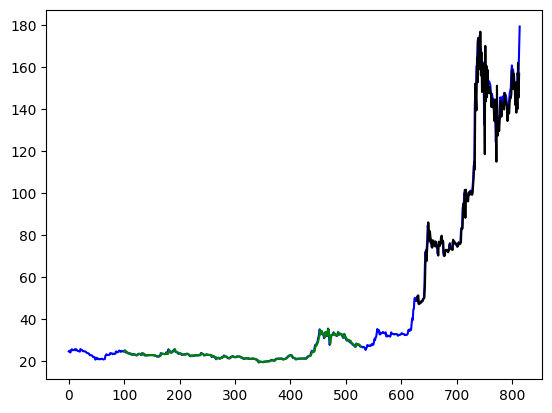

In [21]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(stock_selected_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(stock_selected_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_selected_data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(stock_selected_data), 'b', label='Actual Stock Price')
plt.plot(trainPredictPlot, 'g', label='Train Prediction')
plt.plot(testPredictPlot, 'k', label='Test Prediction')
plt.legend()
plt.show()


## Predict the data

In [22]:
len(test_data)

286

In [23]:
x_input=test_data[len(test_data)-100:].reshape(1,-1) #substarct by len of test data
x_input.shape

(1, 100)

In [25]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.4560800146301215,
 0.4960925288407335,
 0.4892153891401493,
 0.48702721483068456,
 0.48265081851313274,
 0.48108783004942623,
 0.49921850576814664,
 0.5057830763951632,
 0.5032822853135082,
 0.5089090533225763,
 0.5114098444042313,
 0.5079712507046278,
 0.5029696685413179,
 0.5039074711592663,
 0.5223507636501771,
 0.5461081596793431,
 0.5870584765079037,
 0.5870584765079037,
 0.7649265922968822,
 0.8102532577443722,
 0.7924351510992195,
 0.8799625050667861,
 0.8865270756938026,
 0.9527977293166132,
 0.9649891156513204,
 0.9462332540868417,
 0.9199749715787757,
 0.9731165793447982,
 0.9402938216069607,
 0.934354484524325,
 0.8818381103026829,
 0.884026236913525,
 0.8940294012401451,
 0.8905908075405415,
 0.8390121882382255,
 0.7092841457505821,
 0.837449199774519,
 0.8427633987100193,
 0.8715223292038727,
 0.8499531074841714,
 0.8699593407401661,
 0.8690215858208402,
 0.8421381651656387,
 0.8296342574559863,
 0.8358862113108124,
 0.8302594910003669,
 0.8258831423814376,
 0.799624859

Initial x_input shape: (1, 100, 1)
First few elements of temp_input: [0.38849586248397827, 0.38842493295669556, 0.38835546374320984, 0.3882873058319092, 0.38822048902511597]


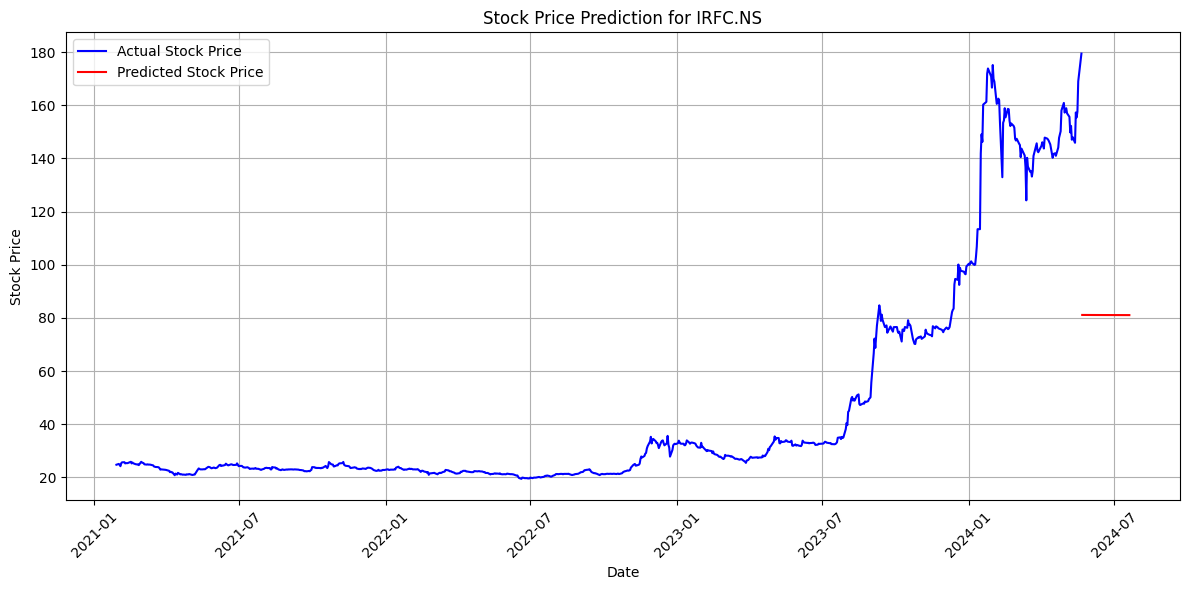

In [37]:
from numpy import array
import pandas as pd
from datetime import datetime, timedelta
# Verify the initial state of x_input
print("Initial x_input shape:", x_input.shape)

# Initialize variables for prediction
lst_output = []
n_steps = 100
# Ensure temp_input is a flat list of numbers
temp_input = list(x_input.flatten())

# Debugging: Print the first few elements of temp_input
print("First few elements of temp_input:", temp_input[:5])

# Efficient prediction loop for the next 30 days
for i in range(60):
    # Ensure temp_input is correctly shaped for the model
    x_input = np.array(temp_input[-n_steps:]).reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose=0)
    # Ensure yhat is a scalar before appending
    predicted_value = yhat[0][0]
    temp_input.append(predicted_value)
    lst_output.append(predicted_value)

# Transforming the predicted values back to the original scale
predicted_stock_price = scaler.inverse_transform(array(lst_output).reshape(-1, 1))

# Generating dates for the next 30 days
last_date = stock_data['Date'].iloc[-1]
dates = [(last_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(1, 61)]

# Creating a DataFrame for the predicted stock prices
predicted_df = pd.DataFrame({
    'Date': dates,
    'Predicted_Price': predicted_stock_price.flatten()
})

# Convert 'Date' column to datetime objects
predicted_df['Date'] = pd.to_datetime(predicted_df['Date'])

scale_factor = 1/scaler.scale_

# Plotting the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['Date']), stock_data['Close'], label='Actual Stock Price', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted_Price'], label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction for IRFC.NS')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):# 30 is the day of prediction ::>>> User data
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.81418526]
101
1 day input [0.7917279  0.79361137 0.79877144 0.79560455 0.7911659  0.78693639
 0.77715954 0.7788689  0.79200406 0.79684065 0.80197169 0.834143
 0.85894384 0.8579052  0.86169914 0.86572525 0.87182155 0.87976965
 0.87456215 0.87304031 0.8739472  0.88421731 0.8907752  0.90144868
 0.90574156 0.89429199 0.91236219 0.9246679  0.93510946 0.92692988
 0.90749761 0.95429658 0.93259191 0.94565015 0.94498569 0.93473987
 0.93943539 0.95105537 0.94844777 0.94502103 0.90900112 0.95382401
 0.95932501 0.97704959 0.98522344 0.982186   0.98784136 0.98599891
 0.99306887 0.99626109 1.         0.98432228 0.97614675 0.96867061
 0.96902509 0.9630512  0.96945368 0.96445371 0.96674737 0.95485066
 0.96148161 0.94364395 0.9221714  0.93046971 0.93720937 0.90853021
 0.87962623 0.87184094 0.87231414 0.87044208 0.87272647 0.87382046
 0.88434635 0.89990233 0.90906418 0.90304661 0.89751163 0.89820298
 0.8798177  0.88125356 0.87962519 0.87320071 0.85804028 0.86279214
 0.85662412 0.85613148 0.85521359 0

In [72]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)### 101 + user duration===>> (101, 101 + user data)

In [73]:
len(stock_selected_data)
scale_factor = 1/scaler.scale_

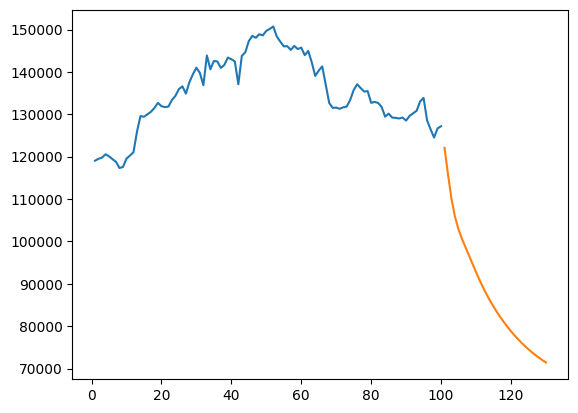

In [74]:
plt.plot(day_new,scaler.inverse_transform(stock_selected_data[len(stock_selected_data)-100:])) # len of stock_selected_data - 300 
plt.plot(day_pred,scale_factor*lst_output)
# print(scaler.inverse_transform(lst_output))

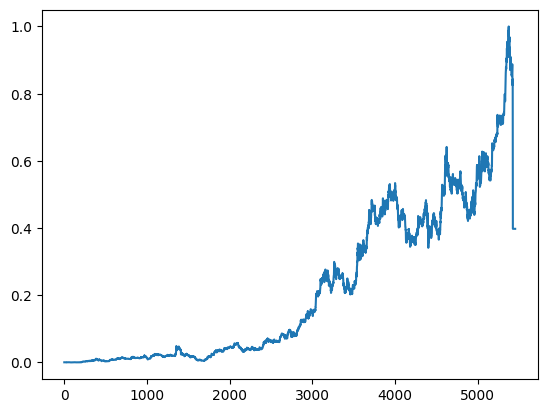

In [57]:
df3=stock_selected_data.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [58]:
df3=scaler.inverse_transform(df3).tolist()

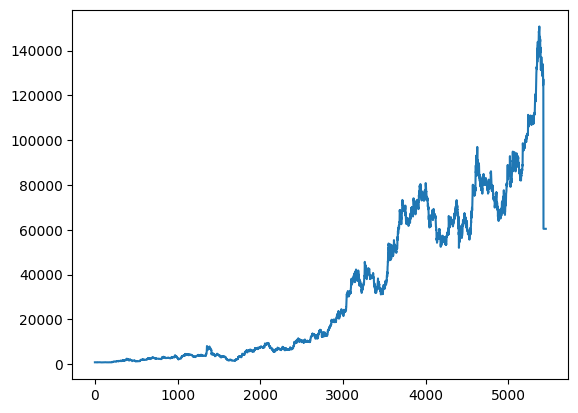

In [59]:
plt.plot(df3)

In [46]:
print(scale_factor*lst_output)
predicted_stock_price = scale_factor*lst_output
#

[[115612.84343124]
 [109542.11898044]
 [104330.241659  ]
 [100445.37867119]
 [ 97968.51101468]
 [ 96516.49125709]
 [ 95615.53186447]
 [ 94870.56565923]
 [ 94039.40915239]
 [ 93033.43269418]
 [ 91874.8227369 ]
 [ 90640.43215056]
 [ 89414.33356088]
 [ 88259.53005897]
 [ 87208.4748042 ]
 [ 86266.22519971]
 [ 85419.7356473 ]
 [ 84647.9098063 ]
 [ 83929.41901715]
 [ 83247.25932549]
 [ 82590.58322705]
 [ 81953.81506889]
 [ 81335.35542494]
 [ 80735.63319156]
 [ 80155.61338562]
 [ 79596.05551112]
 [ 79056.89702067]
 [ 78537.37841027]
 [ 78036.38276226]
 [ 77552.47148671]
 [ 77084.34895912]
 [ 76630.88932651]
 [ 76191.18118407]
 [ 75764.56331654]
 [ 75350.58002153]
 [ 74948.87388539]
 [ 74559.12323582]
 [ 74181.06894794]
 [ 73814.45189684]
 [ 73458.94147491]
 [ 73114.26068656]
 [ 72780.08785951]
 [ 72456.11025681]
 [ 72142.01514153]
 [ 71837.48977671]
 [ 71542.25716679]
 [ 71255.98670413]
 [ 70978.44606986]
 [ 70709.30465636]
 [ 70448.32120941]
 [ 70195.17405672]
 [ 69949.6219441 ]
 [ 69711.387

In [45]:
from datetime import datetime, timedelta

In [49]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming stock_data is your original DataFrame with stock prices
# and it has a column named 'Date' in the format 'YYYY-MM-DD'

# Make a copy of the original DataFrame
stock_data_copy = stock_data.copy()

# Reset the index and rename the index column to 'Date'
# stock_data_copy.reset_index(inplace=True)
stock_data_copy.rename(columns={'index': 'Date'}, inplace=True)

# Extract the last date from the original DataFrame
last_date = stock_data_copy['Date'].max()
last_date_str = last_date.strftime('%Y-%m-%d')

# Now, use last_date_str with strptime
current_date = datetime.strptime(last_date_str, '%Y-%m-%d') + timedelta(days=1)

# Generate dates for the next 30 days, skipping weekends
dates = []
while len(dates) < 365:
    if current_date.weekday() < 7: # 0 is Monday, 5 is Saturday
        dates.append(current_date.strftime('%Y-%m-%d'))
    current_date += timedelta(days=1)

# Create a new DataFrame with these dates
new_df = pd.DataFrame({'Date': dates})

# Assuming predicted_prices is your array of predicted stock prices
# Directly assign this array to the 'Predicted_Price' column of new_df
new_df['Predicted_Price'] = predicted_stock_price

# Now, new_df contains the dates and their predicted stock prices
print(new_df.head(10))


         Date  Predicted_Price
0  2024-05-10    115612.843431
1  2024-05-11    109542.118980
2  2024-05-12    104330.241659
3  2024-05-13    100445.378671
4  2024-05-14     97968.511015
5  2024-05-15     96516.491257
6  2024-05-16     95615.531864
7  2024-05-17     94870.565659
8  2024-05-18     94039.409152
9  2024-05-19     93033.432694


In [50]:
actual_data = [
            {
                'date': [[date] for date in stock_data['Date']],
                'Close': [[close] for close in stock_data['Close']]
            }
        ]

actual_data_with_prediction  = np.concatenate((test_predict, train_predict), axis=0)

predicted_data = [
            {
                'date': [[date] for date in new_df['Date']],
                'Predicted_Price': [[close] for close in new_df['Predicted_Price']]
            }
        ]

print(actual_data)
print(actual_data_with_prediction)
print(predicted_data)

[{'date': [[Timestamp('2002-07-01 00:00:00')], [Timestamp('2002-07-02 00:00:00')], [Timestamp('2002-07-03 00:00:00')], [Timestamp('2002-07-04 00:00:00')], [Timestamp('2002-07-05 00:00:00')], [Timestamp('2002-07-08 00:00:00')], [Timestamp('2002-07-09 00:00:00')], [Timestamp('2002-07-10 00:00:00')], [Timestamp('2002-07-11 00:00:00')], [Timestamp('2002-07-12 00:00:00')], [Timestamp('2002-07-15 00:00:00')], [Timestamp('2002-07-16 00:00:00')], [Timestamp('2002-07-17 00:00:00')], [Timestamp('2002-07-18 00:00:00')], [Timestamp('2002-07-19 00:00:00')], [Timestamp('2002-07-22 00:00:00')], [Timestamp('2002-07-23 00:00:00')], [Timestamp('2002-07-24 00:00:00')], [Timestamp('2002-07-25 00:00:00')], [Timestamp('2002-07-26 00:00:00')], [Timestamp('2002-07-29 00:00:00')], [Timestamp('2002-07-30 00:00:00')], [Timestamp('2002-07-31 00:00:00')], [Timestamp('2002-08-01 00:00:00')], [Timestamp('2002-08-02 00:00:00')], [Timestamp('2002-08-05 00:00:00')], [Timestamp('2002-08-06 00:00:00')], [Timestamp('2002-